In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
import sys

In [7]:
print('Python version used for this notebook is {}'.format(sys.version))

Python version used for this notebook is 3.6.10 |Anaconda, Inc.| (default, May  8 2020, 02:54:21) 
[GCC 7.3.0]


### Load data into dataframes

In [2]:
booked_nights_url = 'https://www.dropbox.com/s/236exp834pp22sj/booked_nights.csv?dl=1'
booked_nights = pd.read_csv(booked_nights_url)

hotel_detail_url = 'https://www.dropbox.com/s/pgw78l9voo33qn6/hotel_detail.csv?dl=1'
hotel_detail = pd.read_csv(hotel_detail_url)

In [3]:
booked_nights.head()

,date,hotel_id,search_day_distance,search_nights,device,date_type,user_country,booked_nights
0,2019-09-17,712163002,45,6,MOBILE,USER_SELECTED,GB,NaN
1,2019-09-17,748670887,0,1,MOBILE,DEFAULT_SELECTION,GB,NaN
2,2019-09-17,19669462,65,2,DESKTOP,USER_SELECTED,GB,NaN
3,2019-09-17,716892314,4,1,MOBILE,DEFAULT_SELECTION,PK,NaN
4,2019-09-17,214980343,4,1,TABLET,USER_SELECTED,DE,NaN


In [4]:
hotel_detail.head()

,hotel_id,country,property_type,star_rating,number_of_reviews,number_of_rooms,median_total_rate,min_total_rate
0,642400614,IN,Resort,NaN,1.0,6.0,74.140000,29.90
1,239303870,TO,Guest House,3.0,15.0,4.0,45.000000,34.02
2,338495639,AR,Hotel,1.0,NaN,9.0,23.000000,20.77
3,933495516,FR,Holiday Park/Campsite,NaN,NaN,14.0,100.330000,78.66
4,848678025,MX,Hotel,3.0,NaN,31.0,29.191667,25.50


### Merge data into single data frame on id column

In [55]:
df_ses = pd.merge(booked_nights,hotel_detail, left_on='hotel_id', right_on='hotel_id', how='left').drop('hotel_id', axis=1)

### Determine the frquency of NAN's in data

In [56]:
null = df_ses.isna().sum()/len(df_ses)
null[null > 0].sort_values()

user_country         0.000319
country              0.000483
number_of_rooms      0.005504
star_rating          0.063848
number_of_reviews    0.123479
booked_nights        0.916870
dtype: float64

### Replace nan's with 0's in booked nights and number of reviews 

#### no booked nights is coded as empty field in the csv-file, and this becomes NaN when reading file.

In [57]:
df_ses['booked_nights'] = df_ses['booked_nights'].fillna(0)

#### no number_of_reviews is coded as empty field in the csv-file, and this becomes NaN when reading file.

In [58]:

df_ses['number_of_reviews'] = df_ses['number_of_reviews'].fillna(0)

### Drop nan entries of user_country, country, star_rating as these are a small part of the total data

In [59]:
df_ses = df_ses.dropna(subset=['user_country','country','star_rating','number_of_rooms'])

In [60]:
df_ses.head()

,date,search_day_distance,search_nights,device,date_type,user_country,booked_nights,country,property_type,star_rating,number_of_reviews,number_of_rooms,median_total_rate,min_total_rate
0,2019-09-17,45,6,MOBILE,USER_SELECTED,GB,0.0,JM,Resort,4.0,17690.0,901.0,303.181538,191.124
1,2019-09-17,0,1,MOBILE,DEFAULT_SELECTION,GB,0.0,GB,Hotel,4.0,1.0,119.0,74.300000,60.080
2,2019-09-17,65,2,DESKTOP,USER_SELECTED,GB,0.0,GB,Hotel,4.0,2365.0,44.0,140.167500,94.130
3,2019-09-17,4,1,MOBILE,DEFAULT_SELECTION,PK,0.0,PK,Hotel,4.0,174.0,94.0,87.770000,65.490
4,2019-09-17,4,1,TABLET,USER_SELECTED,DE,0.0,DE,Hotel,2.0,28.0,15.0,92.890000,78.200


#### List data types in dataframe

In [61]:
df_ses.dtypes

date                    object
search_day_distance      int64
search_nights            int64
device                  object
date_type               object
user_country            object
booked_nights          float64
country                 object
property_type           object
star_rating            float64
number_of_reviews      float64
number_of_rooms        float64
median_total_rate      float64
min_total_rate         float64
dtype: object

#### Cast user_country, country and property_type to str as this makes further processing easier: no mixed datatype errors.

In [62]:
df_ses['user_country'] = df_ses['user_country'].astype(str)

In [63]:
df_ses['country'] = df_ses['country'].astype(str)

In [64]:
df_ses['property_type'] = df_ses['property_type'].astype(str)

In [65]:
df_ses['property_type'].unique()

array(['Resort', 'Hotel', 'Bed & Breakfast', 'Inn', 'Apartment',
       'Serviced Apartment', 'Motel', 'Hostel', 'Ryokan',
       'Country House/Manor', 'Bungalow', 'Holiday Home', 'Guest House',
       'Farm Stay', 'Villa', 'Lodge', 'Holiday Park/Campsite', 'Riad',
       'Capsule Hotel', 'Homestay', 'Other', 'Agriturismo / Farm Stay',
       'Pousada / Guest House', 'Chalet', 'Cottage', 'Luxury Tents/Yurts',
       'Eco Hotel', 'Retreat', 'Pension', 'Boat'], dtype=object)

### Transform date to datetime object WEEKDAY

In [66]:
df_ses['WEEKDAY'] = pd.to_datetime(df_ses['date']).dt.dayofweek

### Plot weekday histogram

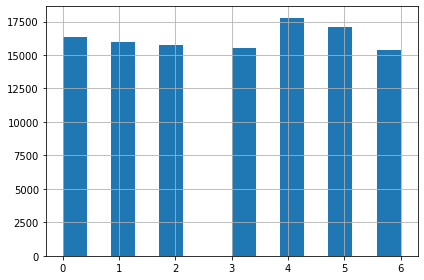

In [67]:
df_ses['WEEKDAY'].hist(bins=14)
plt.tight_layout()
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/WEEKDAY.png',dpi=300)

### Transform date to datetime object dayofmonth

In [68]:
df_ses['dayofmonth'] = pd.to_datetime(df_ses['date']).dt.day

### Plot dayofmonth histogram

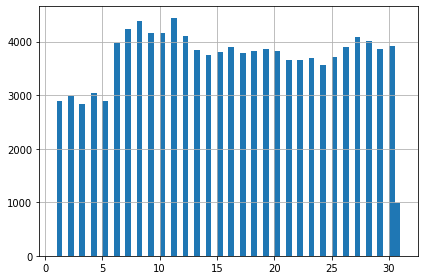

In [69]:
df_ses['dayofmonth'].hist(bins=60)
plt.tight_layout()
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/dayofmonth.png',dpi=300)

# in the beginning of the month there is a drop in bookings

### Display frequences of booked nights values

In [70]:
df_ses.booked_nights.value_counts()
# half values are supicious and thus removed


0.0     103924
1.0       6640
2.0       1659
3.0        527
0.5        363
4.0        292
5.0        118
7.0         77
6.0         72
1.5         28
8.0         27
9.0         18
11.0        13
12.0         7
14.0         7
2.5          5
10.0         5
16.0         5
13.0         5
15.0         5
25.0         3
21.0         2
28.0         2
23.0         1
17.0         1
22.0         1
3.5          1
27.0         1
20.0         1
Name: booked_nights, dtype: int64

### remove half-night values as these are suspected errors

In [71]:
df_ses = df_ses[df_ses['booked_nights'].isin([0.5,1.5,2.5,3.5]) == False]

In [72]:
df_ses.columns.values

array(['date', 'search_day_distance', 'search_nights', 'device',
       'date_type', 'user_country', 'booked_nights', 'country',
       'property_type', 'star_rating', 'number_of_reviews',
       'number_of_rooms', 'median_total_rate', 'min_total_rate',
       'WEEKDAY', 'dayofmonth'], dtype=object)

### drop date and WEEKDAY as they have been replaced by dayofmonth

In [73]:
df_ses = df_ses.drop(['date','WEEKDAY'],axis=1)

### Examine numerical variable in dataset 

In [74]:
df_ses.describe()

,search_day_distance,search_nights,booked_nights,star_rating,number_of_reviews,number_of_rooms,median_total_rate,min_total_rate,dayofmonth
count,113413.000000,113413.000000,113413.000000,113413.000000,113413.000000,113413.000000,113413.000000,113413.000000,113413.000000
mean,16.479134,1.772204,0.136871,3.045436,1715.798339,152.248120,136.507102,81.357460,15.993793
std,36.510990,2.028628,0.647348,1.002443,2971.598773,223.722144,231.356958,142.467998,8.522455
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.810000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,172.000000,47.000000,62.770000,44.690000,9.000000
50%,4.000000,1.000000,0.000000,3.000000,708.000000,93.000000,87.440000,61.490000,16.000000
75%,18.000000,2.000000,0.000000,4.000000,1778.000000,155.000000,134.130000,88.000000,23.000000
max,330.000000,29.000000,28.000000,5.000000,28099.000000,2109.000000,20387.000000,20256.000000,31.000000


### Plot booked nights histogram

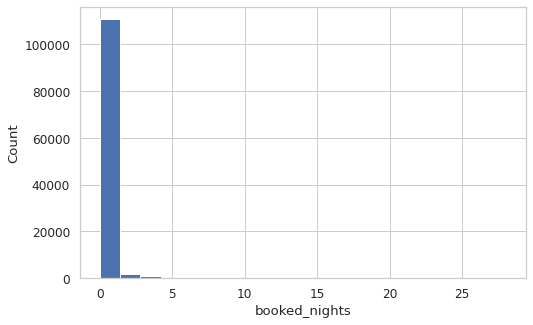

In [77]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_ses['booked_nights'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='booked_nights', ylabel='Count');
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_count.png',dpi=300)

### Check that no nonsense categorical values are left in data frame

In [78]:
df_ses.star_rating.value_counts()

3.0    38496
2.0    34362
4.0    27672
5.0     9434
1.0     3322
0.0      127
Name: star_rating, dtype: int64

In [79]:
df_ses.device.value_counts()

MOBILE     86824
DESKTOP    22304
TABLET      4285
Name: device, dtype: int64

In [80]:
df_ses.date_type.value_counts()

USER_SELECTED        68071
DEFAULT_SELECTION    45342
Name: date_type, dtype: int64

In [81]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_ses.country.value_counts())


US    49648
IT     4691
ES     4413
JP     3976
TH     3817
GB     3704
DE     3549
FR     3435
MX     2155
IN     1883
AU     1690
BR     1573
MV     1569
MY     1477
AE     1403
CA     1392
TR     1273
AT     1195
SA     1134
GR     1034
ZA      916
ID      875
PT      855
EG      720
NL      708
BD      705
PL      701
AR      607
JM      589
MA      565
CN      479
NO      371
MT      355
VN      351
CH      336
BE      321
DO      296
SG      295
NZ      274
TW      271
CR      261
NG      261
KR      258
RU      256
PH      253
DK      251
FI      245
GT      243
HU      235
KH      230
CZ      212
KE      211
DZ      209
PK      200
HR      197
IE      196
SE      176
GE      172
SV      156
AZ      135
CY      116
SI      114
LK      108
FJ      103
BS       96
AM       93
JO       92
TN       89
KW       83
MU       81
LV       81
PY       80
BG       79
SC       76
ZW       71
RO       65
BH       63
HK       62
MM       62
CL       61
AL       59
AD       59
SK       58
OM  

In [82]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_ses.user_country.value_counts())


US    48772
DE     4985
GB     4747
IT     3796
FR     3608
JP     3246
ES     2933
TH     2826
IN     2385
CA     2285
BR     1837
AU     1823
MY     1805
MX     1789
SA     1478
NL     1371
ZA      962
AT      941
PL      934
CH      917
AR      876
AE      866
PT      823
BE      812
ID      807
GR      773
KR      758
BD      753
RU      654
TR      581
IL      551
EG      506
SE      486
SG      476
DK      450
IE      435
NO      393
JM      368
MA      350
NG      340
FI      332
PK      322
DZ      303
NZ      295
HU      272
PH      239
UA      229
RO      226
GT      225
CR      214
KE      197
MT      185
CZ      175
KW      172
DO      165
KH      161
CO      158
HR      156
MV      149
CL      139
SV      117
SK      107
AZ      101
QA      101
BG      100
OM      100
CN       92
TN       91
CY       91
GE       90
JO       89
AM       85
SI       83
LU       83
EC       83
LB       81
LV       78
KZ       78
VN       74
LT       71
PY       71
BS       66
FJ       63
BH  

In [83]:
df_ses.property_type.value_counts()

Hotel                      80996
Resort                     11200
Motel                       6387
Hostel                      3139
Serviced Apartment          2933
Guest House                 2342
Apartment                   1911
Bed & Breakfast              818
Inn                          701
Lodge                        594
Chalet                       356
Holiday Park/Campsite        353
Villa                        247
Capsule Hotel                214
Ryokan                       210
Holiday Home                 208
Pousada / Guest House        206
Country House/Manor          172
Homestay                     106
Riad                          93
Farm Stay                     53
Agriturismo / Farm Stay       49
Other                         42
Luxury Tents/Yurts            29
Cottage                       20
Bungalow                      15
Pension                       13
Eco Hotel                      4
Retreat                        1
Boat                           1
Name: prop

### Create a dataframe with non-zero booked_nights to see what influences a performed booking

In [85]:
df_ses_nonzero_booking = df_ses[df_ses.booked_nights>0]

### Plot categorical variables against booked nights

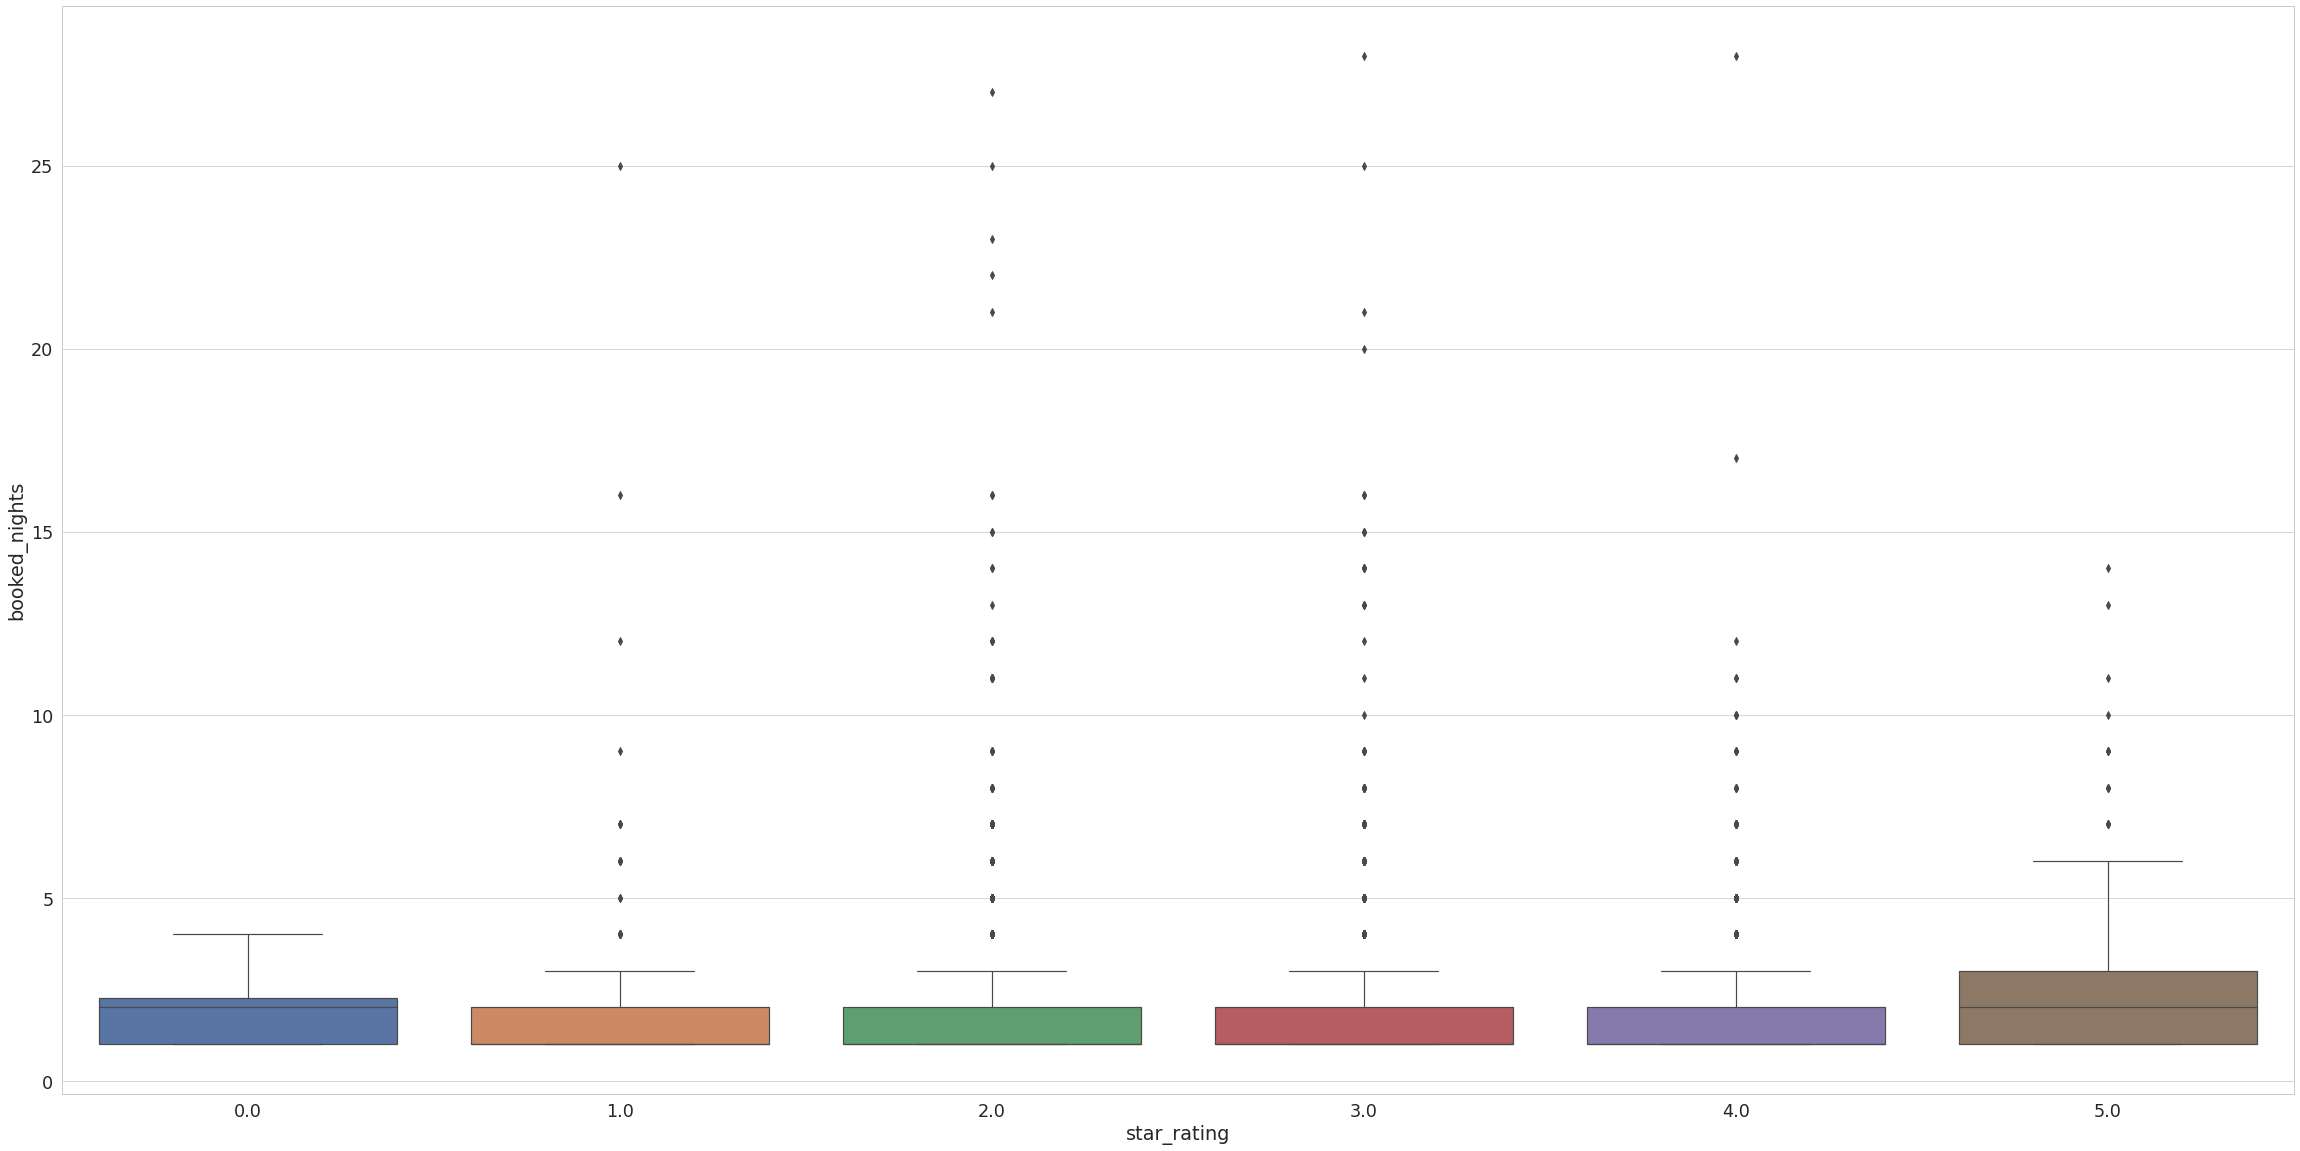

<Figure size 576x360 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='star_rating', y='booked_nights', data=df_ses_nonzero_booking)
plt.show()
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_starrating.png',dpi=300)  

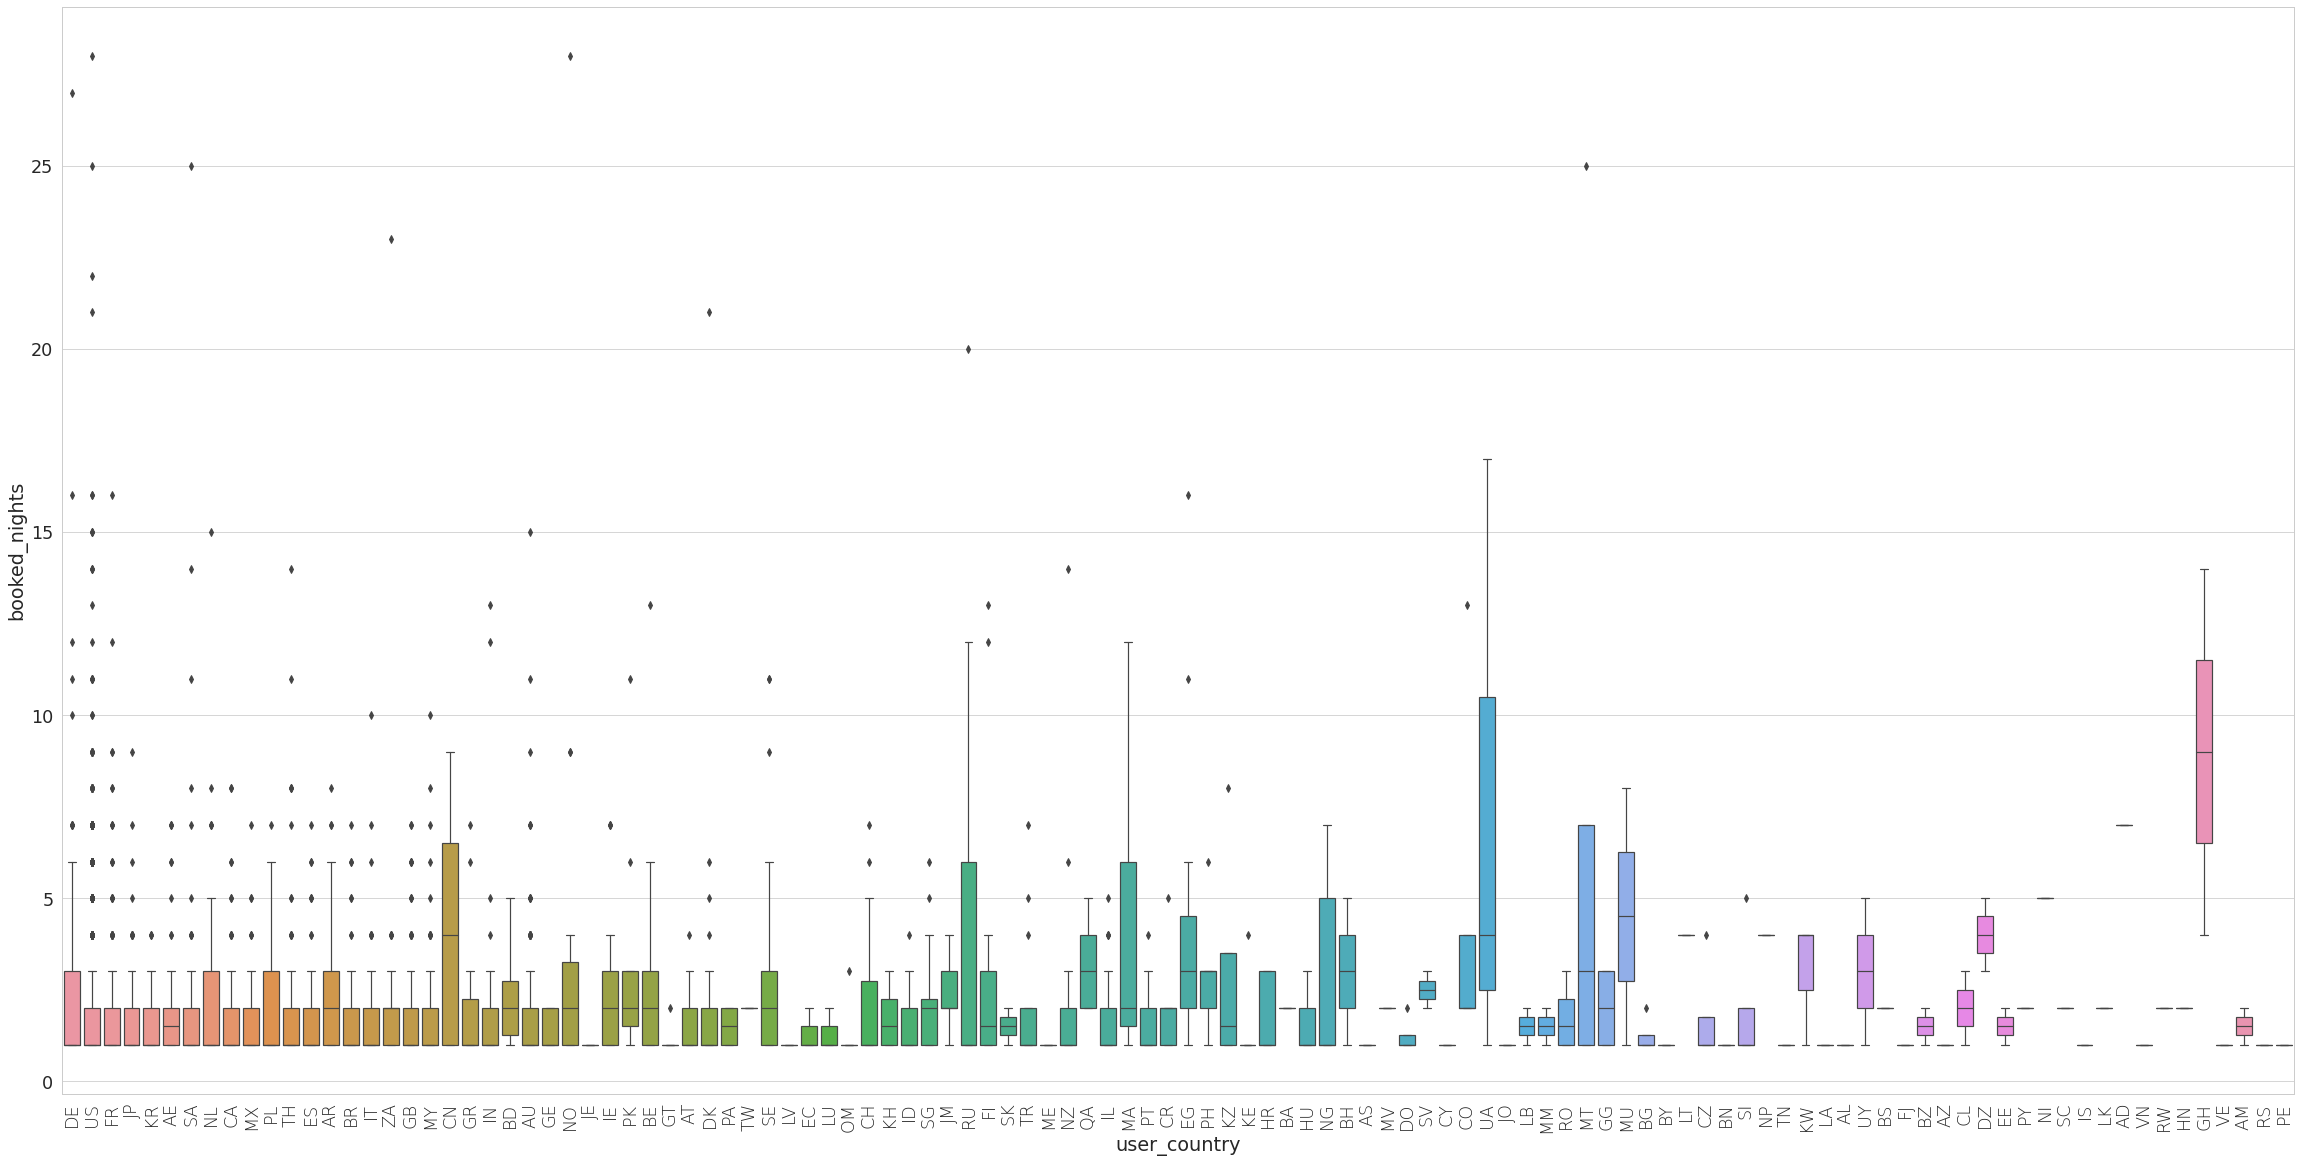

In [87]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='user_country', y='booked_nights', data=df_ses_nonzero_booking)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    fontweight='light'
)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_usercountry.png',dpi=300)      

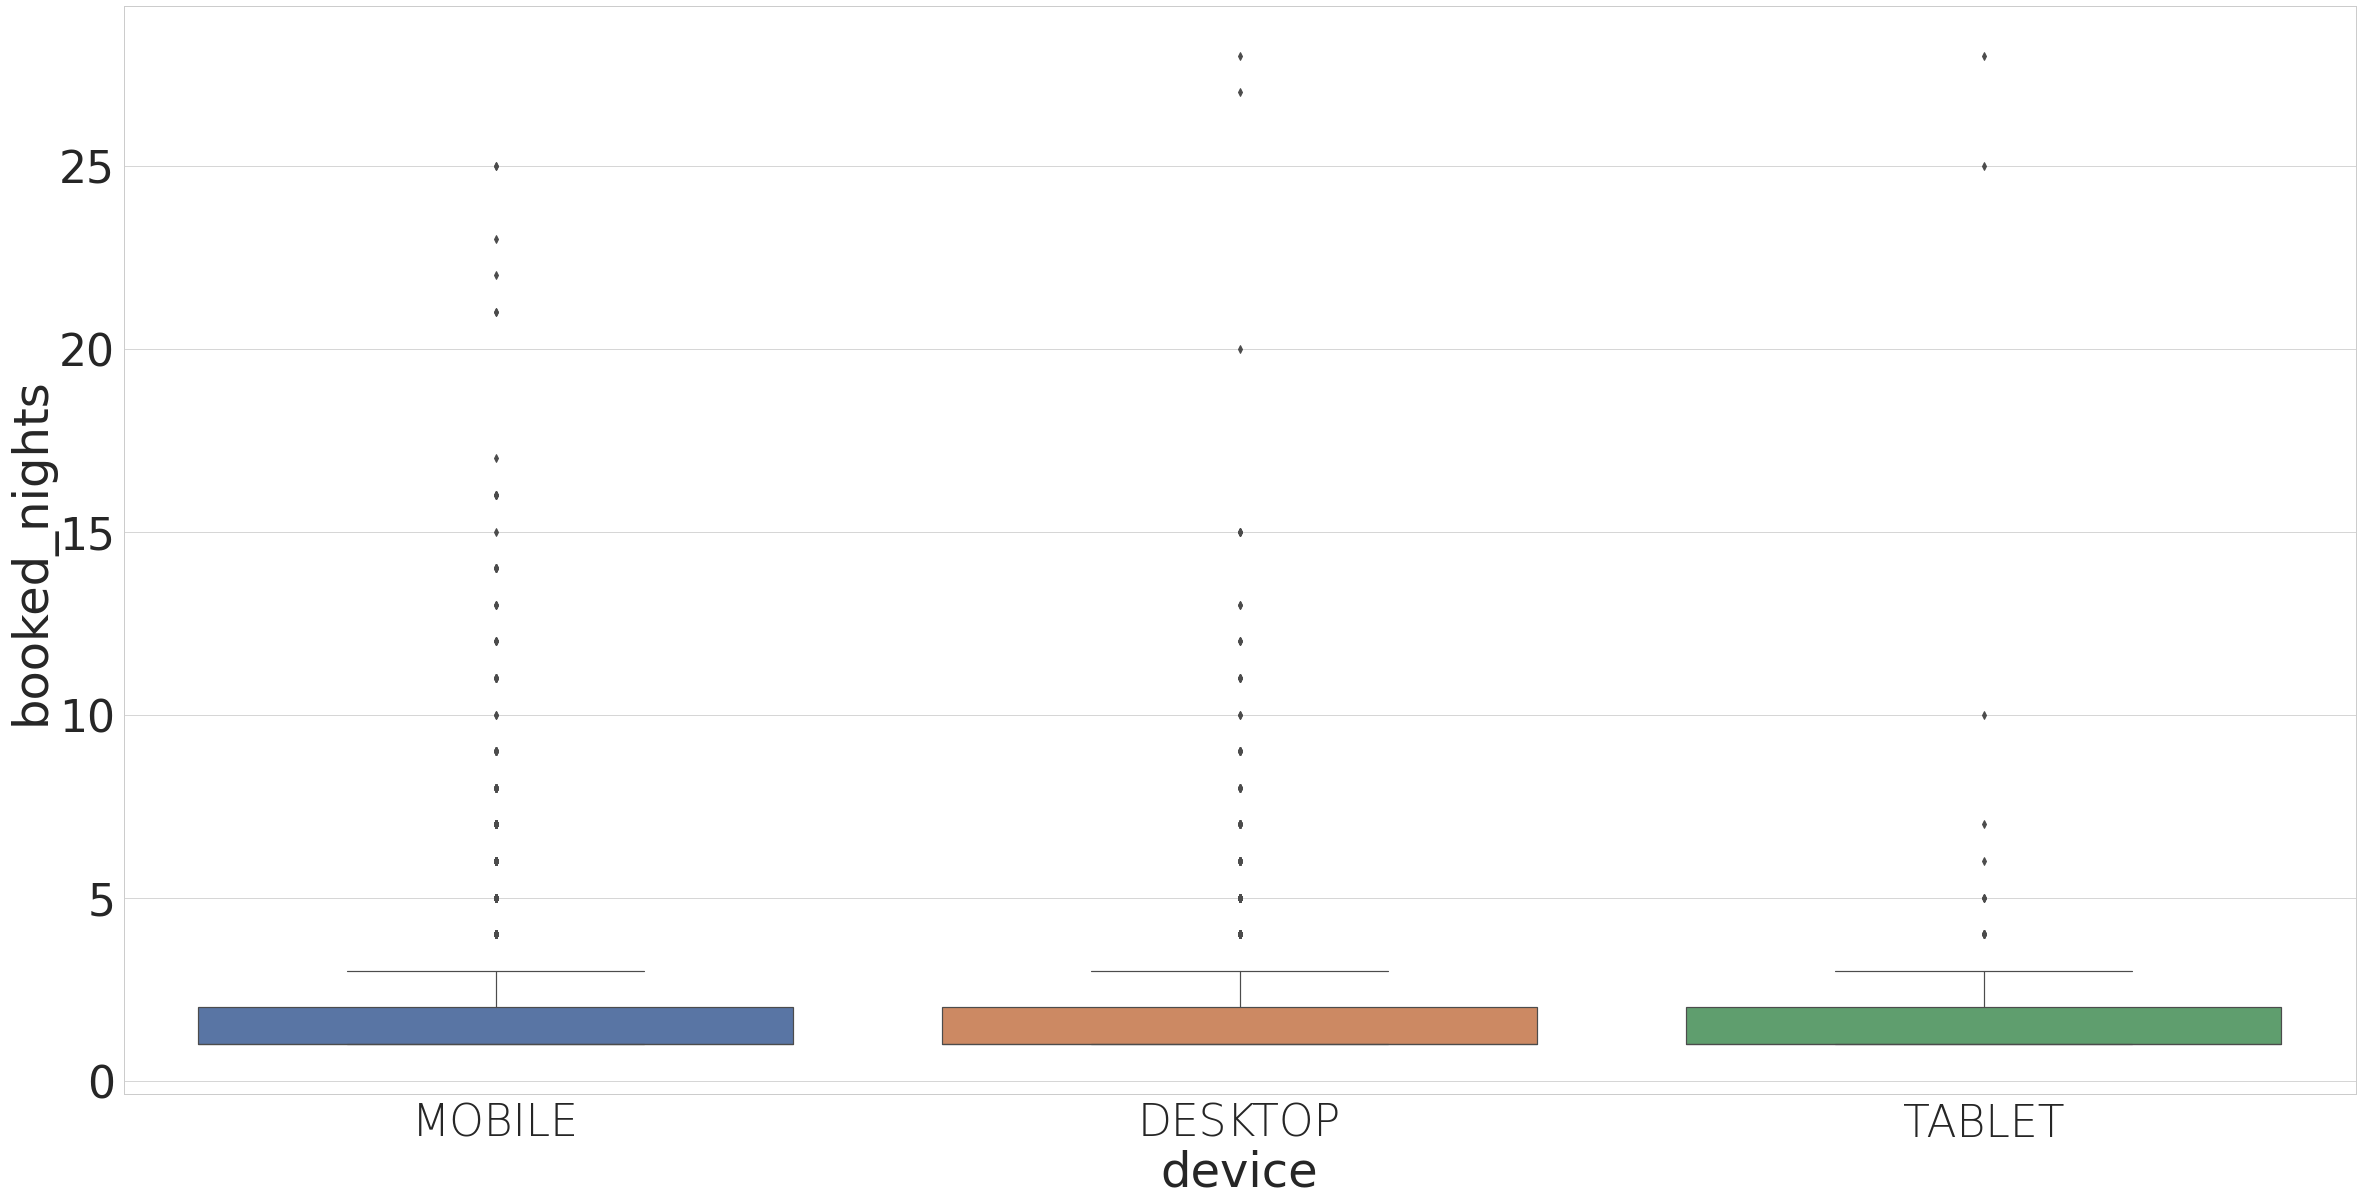

In [88]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=5)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='device', y='booked_nights', data=df_ses_nonzero_booking)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    fontweight='light'
)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_device.png',dpi=300)      

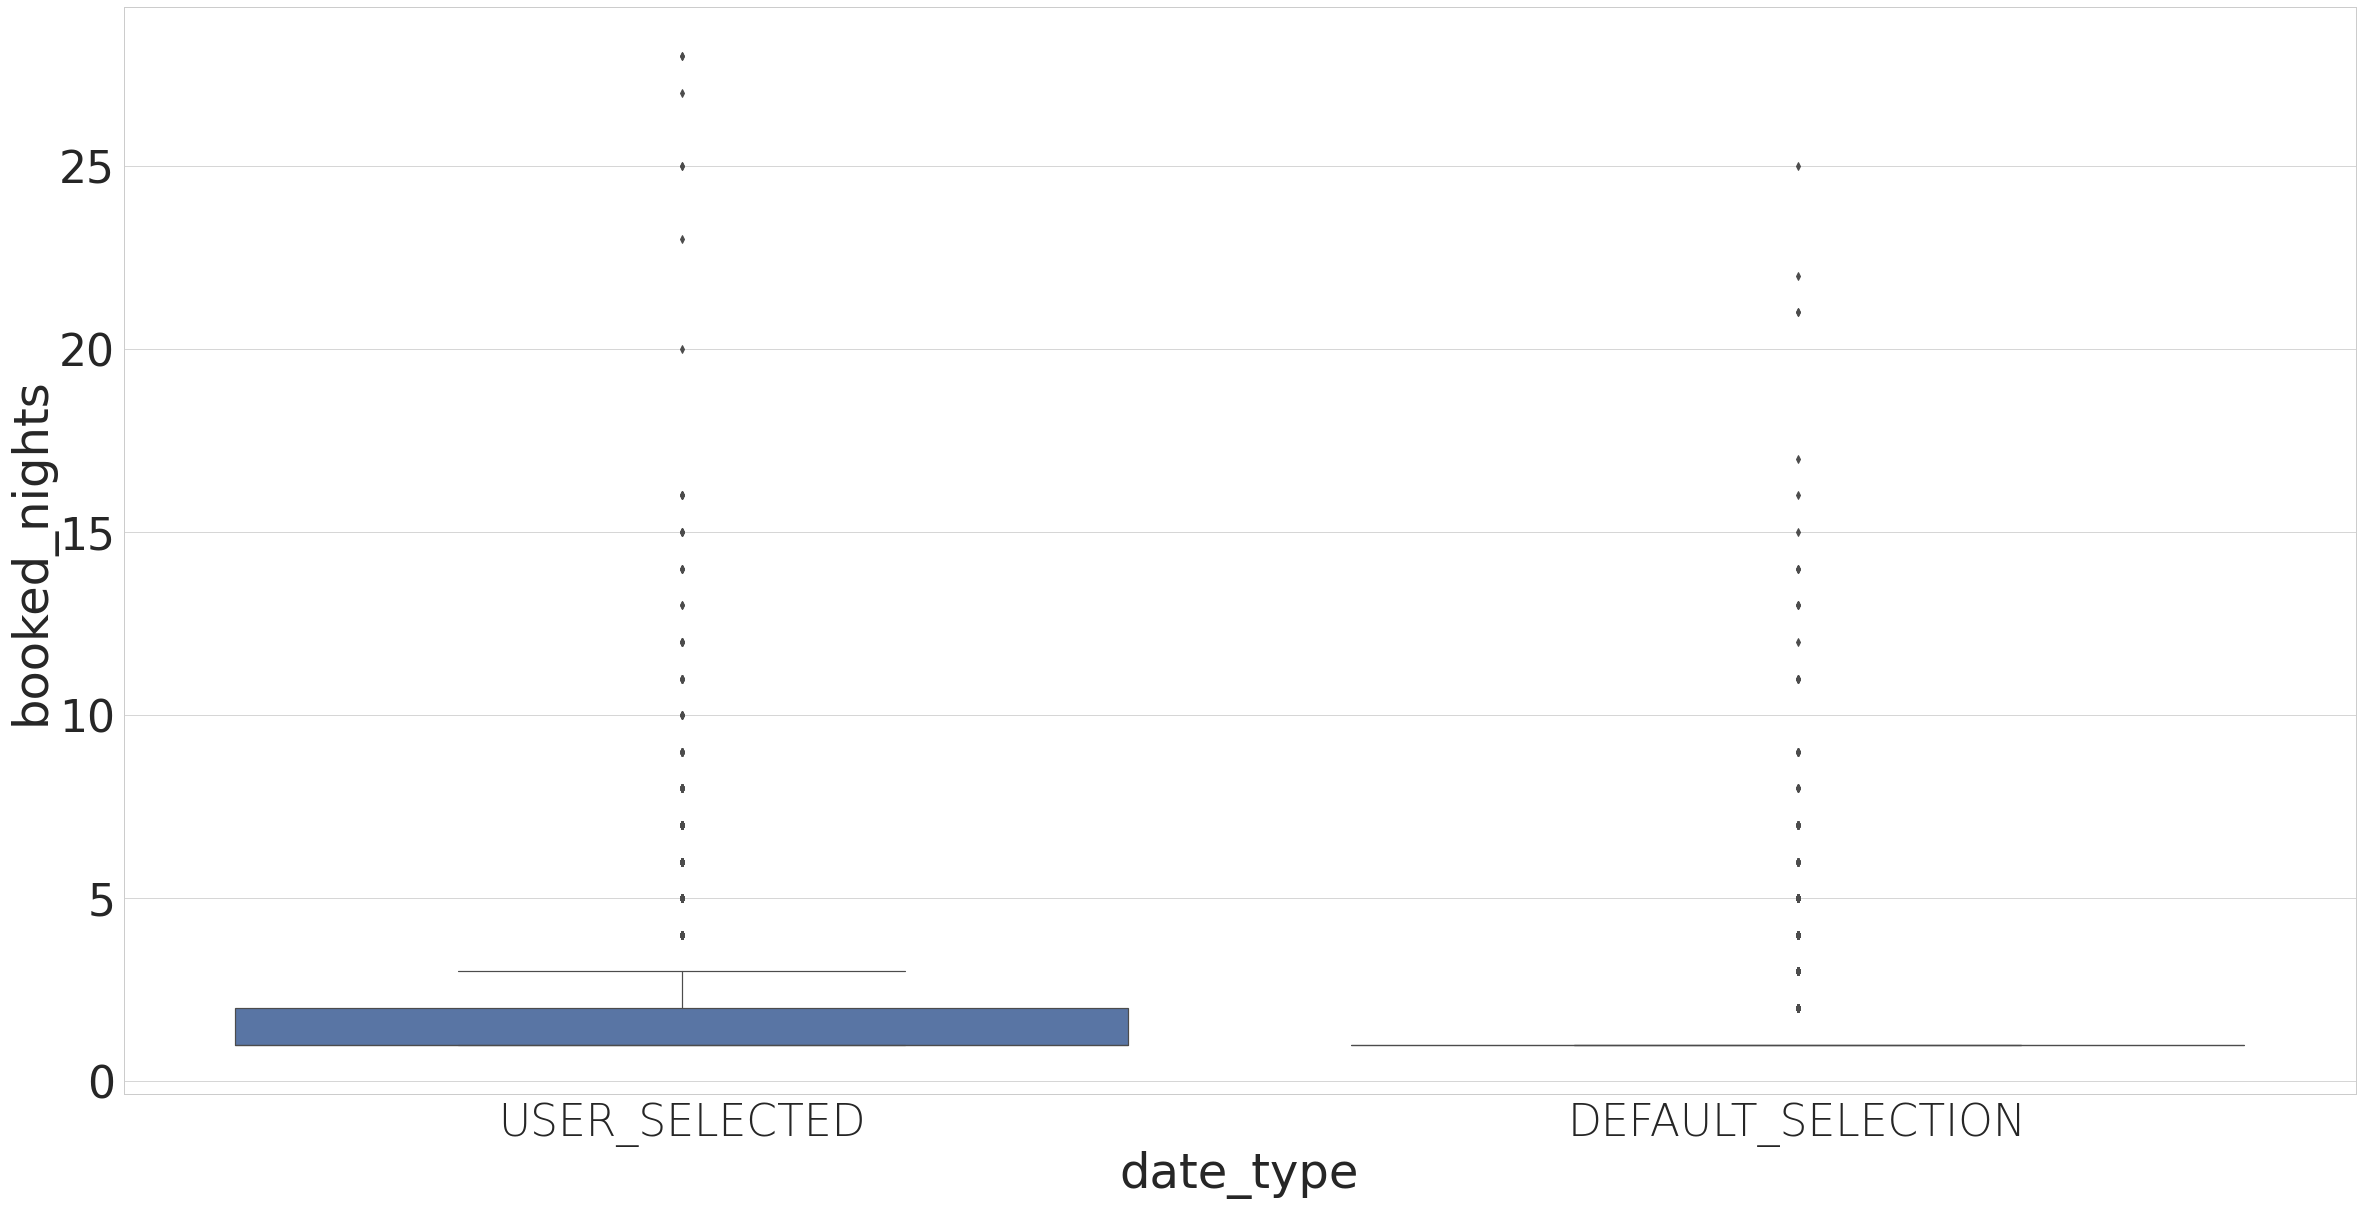

In [89]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=5)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='date_type', y='booked_nights', data=df_ses_nonzero_booking)
chart.set_xticklabels(
    chart.get_xticklabels(), 
     fontweight='light'
)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_datetype.png',dpi=300)  

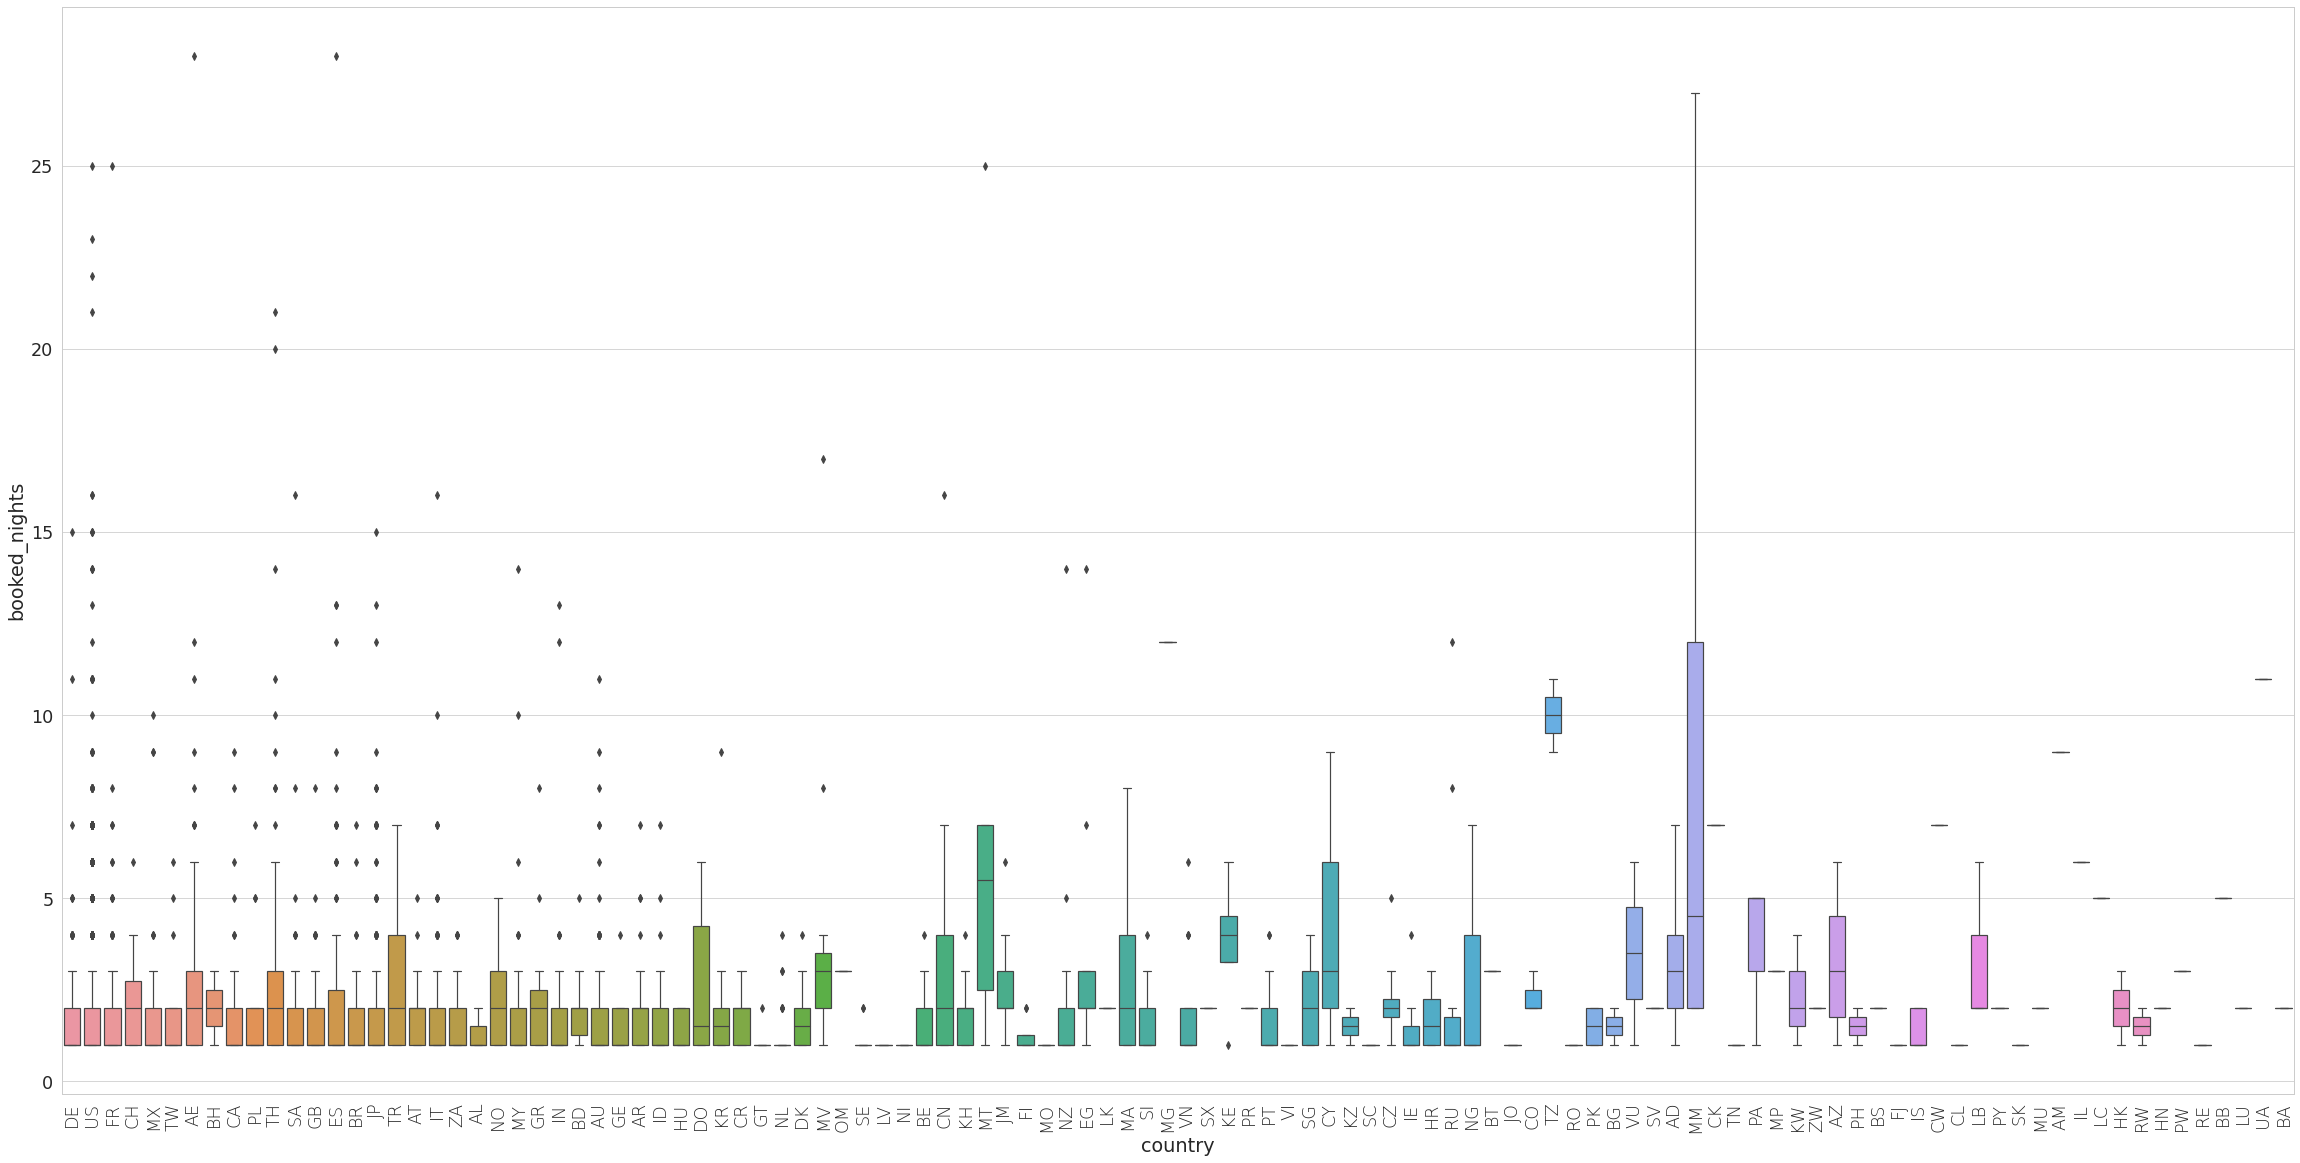

In [90]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='country', y='booked_nights', data=df_ses_nonzero_booking)
chart.set_xticklabels(
    chart.get_xticklabels(), 
     fontweight='light',
    rotation=90
)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_country.png',dpi=300)  

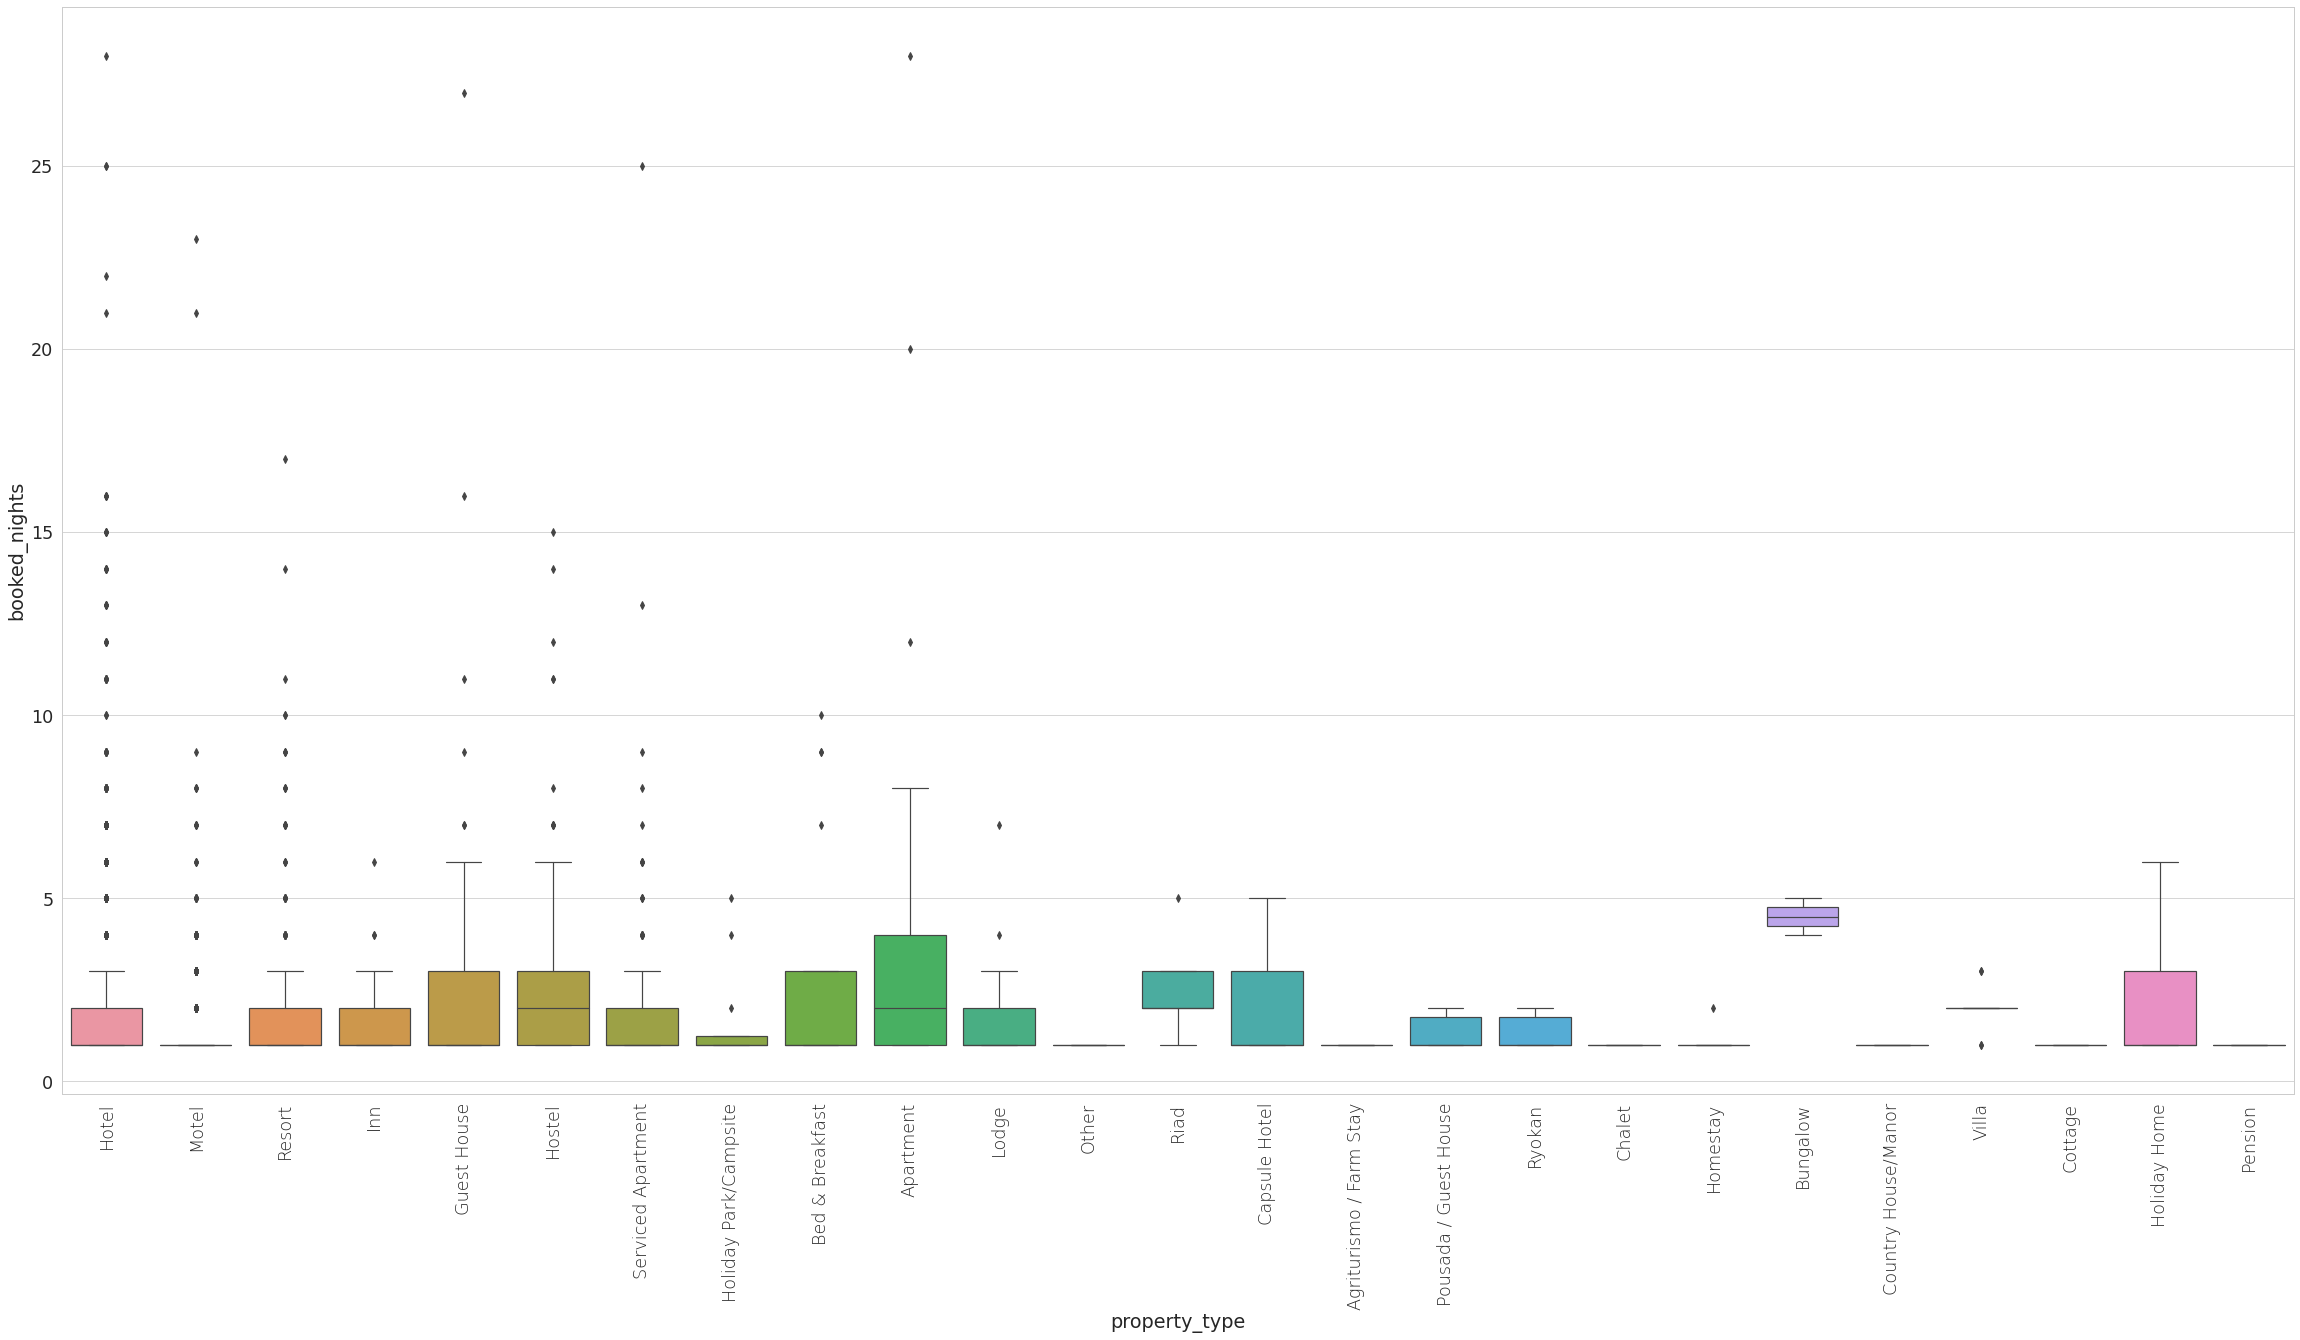

In [91]:
import matplotlib.pyplot as plt 
sns.set_context("paper", font_scale=2)  
plt.figure(figsize=(40,20))
chart = sns.boxplot(x='property_type', y='booked_nights', data=df_ses_nonzero_booking)
chart.set_xticklabels(
    chart.get_xticklabels(), 
     fontweight='light',
    rotation=90
)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_propertytype.png',dpi=300)  

### Compute correlation matrix for numerical variables (non-zero booking data frame) and display as heatmap

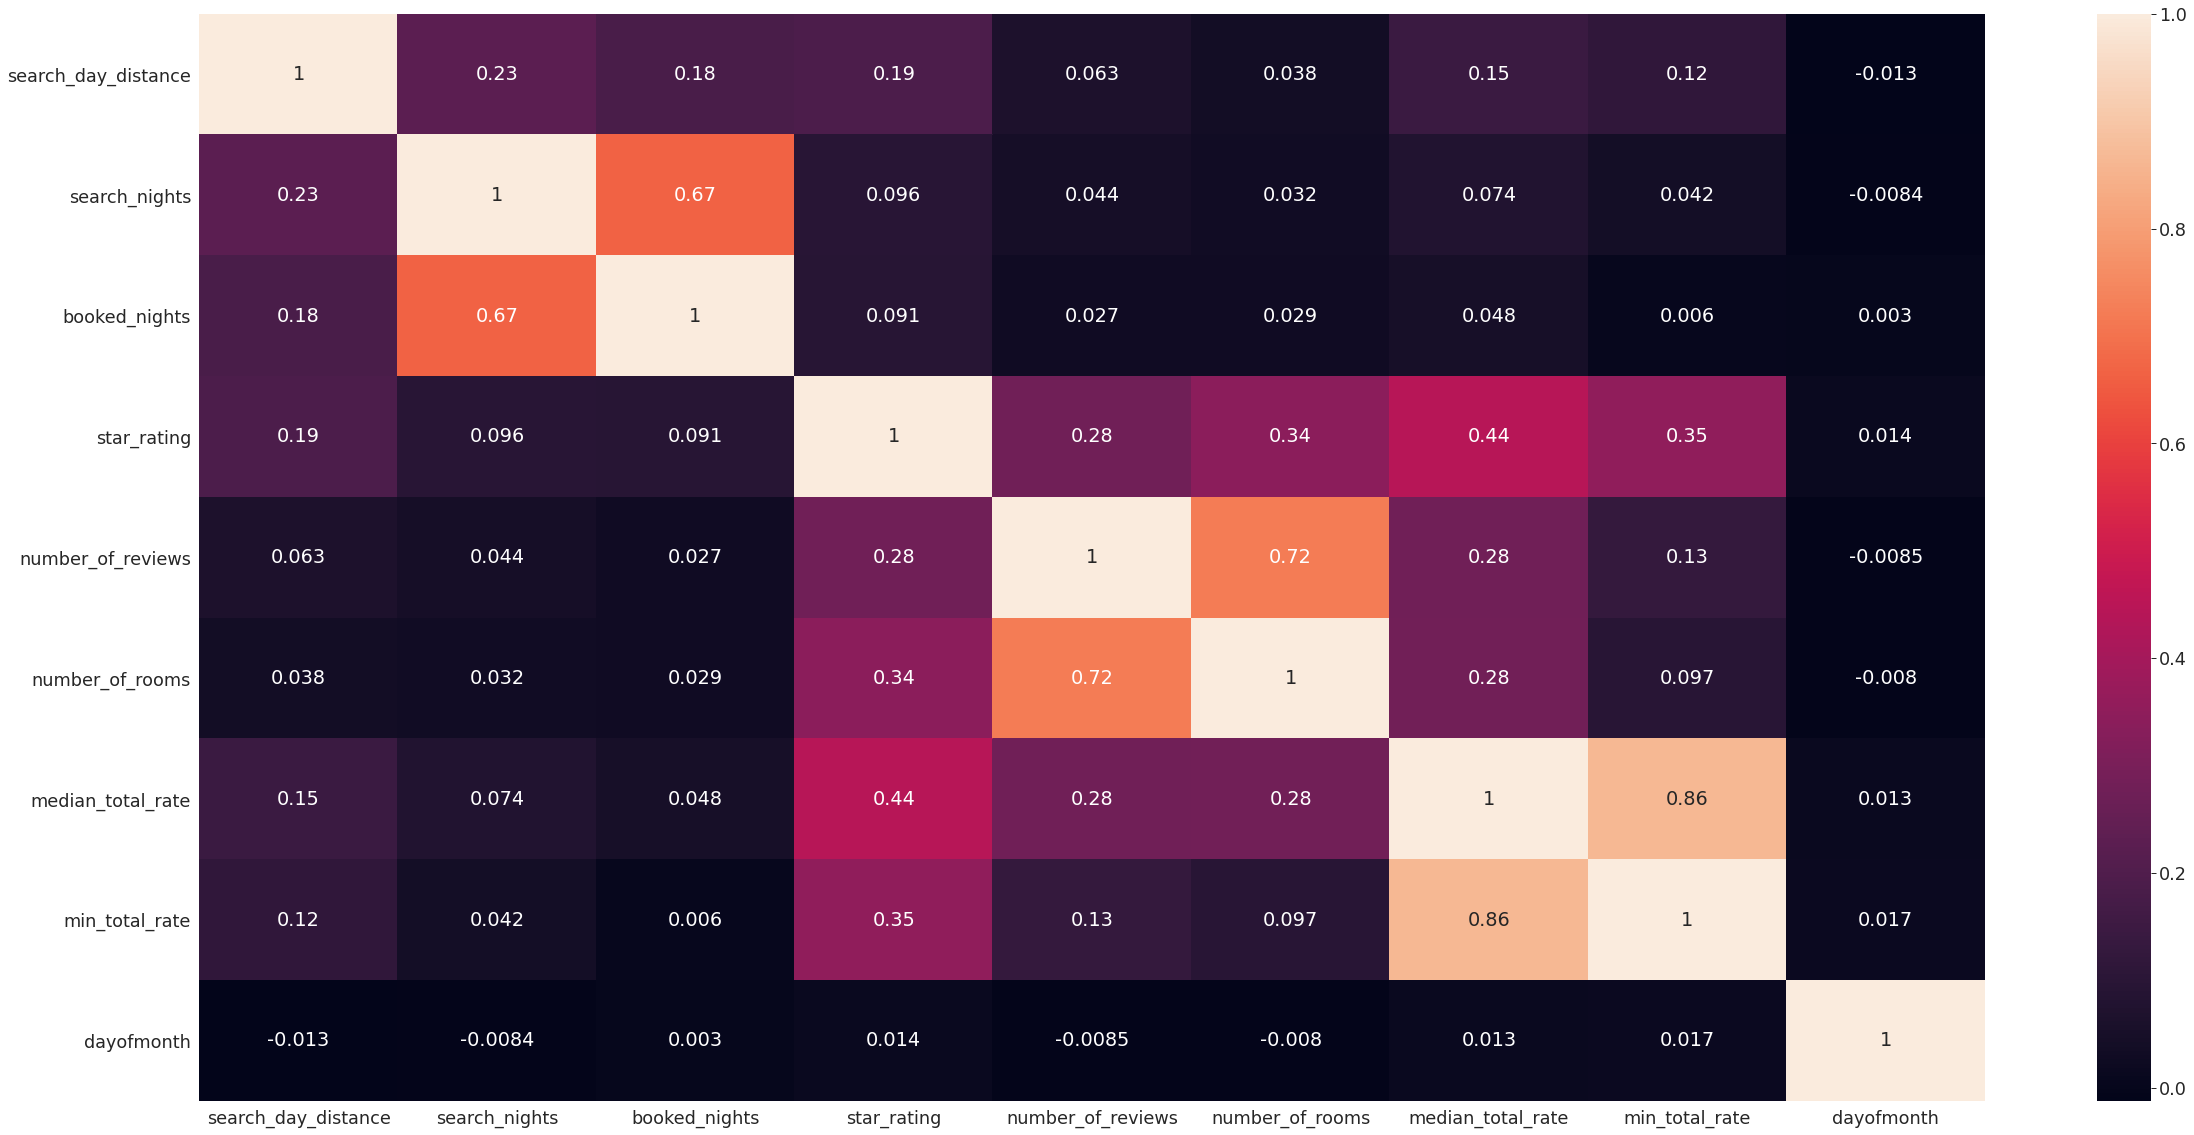

In [267]:
plt.figure(figsize=(40,20))
sns.heatmap(df_ses_nonzero_booking[numerical].corr(),annot=True)
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/bookednights_vs_corrcoef.png',dpi=300)  

### one-hot-encoding for xgboost model of categorical variables

In [92]:
df = pd.get_dummies(df_ses.user_country, drop_first=True,prefix='user_country')

In [93]:
df_ses = pd.concat([df_ses,df], axis=1)

In [94]:
df = pd.get_dummies(df_ses.country, drop_first=True,prefix='country')

In [95]:
df_ses = pd.concat([df_ses,df], axis=1)

In [96]:
df = pd.get_dummies(df_ses.property_type, drop_first=True,prefix='property_type')

In [97]:
df_ses = pd.concat([df_ses,df], axis=1)

In [98]:
df = pd.get_dummies(df_ses.device, drop_first=True,prefix='device')

In [99]:
df_ses = pd.concat([df_ses,df], axis=1)

In [100]:
from sklearn.preprocessing import LabelBinarizer
lb_datetype = LabelBinarizer()
lb_results = lb_datetype.fit_transform(df_ses["date_type"])
df_ses['date_type_ind'] = lb_results

### drop orginal category variables which have been one-hot-encoded

In [102]:
df_ses_clean = df_ses.drop(['device','date_type','user_country','country','property_type'], axis = 1) 

### Create new variable num_reviews_times_star

In [103]:
df_ses_clean['num_reviews_times_star'] = df_ses_clean['number_of_reviews']*df_ses_clean['star_rating']

### drop variables which were used to create num_reviews_times_star

In [104]:
df_ses_clean = df_ses_clean.drop(['number_of_reviews','star_rating'],axis=1)

### create training and testing data frame

In [105]:
mask = np.random.rand(len(df_ses_clean)) < 0.8
df_train = df_ses_clean[mask]
df_test = df_ses_clean[~mask]
print('Training data set length='+str(len(df_train)))
# Set aside data for independent testing
print('Testing data set length='+str(len(df_test)))


Training data set length=90615
Testing data set length=22798


In [211]:
#df_train = df_train.drop(['WEEKDAY'],axis=1)


### Create independent predictors and response dataframe

In [106]:
#df_test = df_test.drop(['WEEKDAY'],axis=1)
X_test = df_test.drop(['booked_nights'],axis=1)
y_test = df_test['booked_nights']

### Create training data frame of predictors X and response y

In [107]:
X = df_train.drop(['booked_nights'],axis=1)
y = df_train['booked_nights']

### create function to calculate variance inflation

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# uncomment and calculate if VIF.pkl does not exist. This takes a long time to run (10 min)
#B = calc_vif(X)
#B.to_pickle("./dummy.pkl")

### Read saved VIF results

In [108]:
C = pd.read_pickle("./VIF.pkl")

### List variables that have a variance inflation smaller than 5

In [109]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(C[C['VIF']<5])

                               variables       VIF
0                    search_day_distance  1.530782
1                          search_nights  2.297581
2                        number_of_rooms  4.103411
5                             dayofmonth  4.557995
7                        user_country_AF  1.170276
8                        user_country_AG  1.063987
9                        user_country_AL  2.845844
10                       user_country_AM  3.918471
13                       user_country_AS  1.392614
16                       user_country_AZ  4.187558
17                       user_country_BA  1.971447
20                       user_country_BG  3.542124
21                       user_country_BH  2.796433
22                       user_country_BI  1.034768
23                       user_country_BJ  1.130293
24                       user_country_BN  2.125945
25                       user_country_BO  1.294804
27                       user_country_BS  3.083899
28                       user_c

### Remove all variables with VIF > 5

In [110]:
drop_vect = C[C['VIF']>5].variables.values

In [111]:
X = X.drop(drop_vect,axis=1)

In [112]:
X_test = X_test.drop(drop_vect,axis=1)

### Train tweedie predicotor with RMSLE loss over 5 cross-validation folds

In [114]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [152]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [116]:
num_boost_round = 100

In [155]:
params = {"objective":"reg:tweedie",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 11, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=num_boost_round,early_stopping_rounds=10,metrics="rmsle", 
                    as_pandas=True, seed=123)

In [286]:
print(cv_results.tail(1))

    train-rmsle-mean  train-rmsle-std  test-rmsle-mean  test-rmsle-std
57          0.251552         0.000947         0.263538        0.002489


### Train predictor with RMSLE loss 

In [121]:
xg_reg = xgb.XGBRegressor(objective ='reg:tweedie', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 11, alpha = 10, n_estimators = num_boost_round)

In [122]:
xg_reg.fit(X,y,eval_metric='rmsle')

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:tweedie', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Plot feature importance

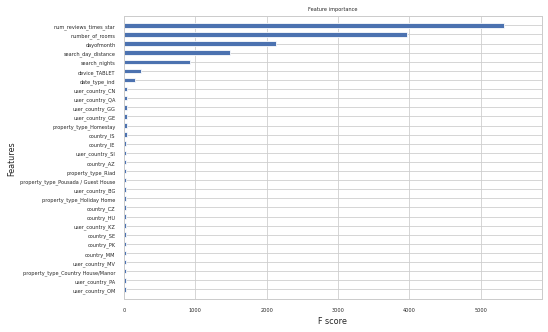

In [268]:
# plot feature importance
import matplotlib.pyplot as plt 
from xgboost import plot_importance
plot_importance(xg_reg,max_num_features= 30,show_values=False, height =0.5)
#plt.figure(figsize=(40,20))
plt.ylabel('Features',fontsize=8)
plt.xlabel('F score',fontsize=8)
plt.title('Feature importance',fontsize=5)
plt.tick_params(labelsize=5)
plt.tight_layout()
#plt.show()
plt.savefig('/home/mattias/Documents/Assignment_findhotel/plots/feature_importance.png', dpi=300)

### Test predictor on independent test data set with evaluation measure RMSE and MAE

In [123]:
range_y_test = np.max(y_test)-np.min(y_test)

In [124]:
y_pred = np.round(xg_reg.predict(X_test))

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

rmse_test = sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

norm_test_rmse_mean = rmse_test/range_y_test
round_nrmse_test = round(float(norm_test_rmse_mean),2)

In [126]:
print('Using {} estimators, the normalized mean RMSE is {}. Thus the prediction errors are {} percent of the range of data.'.format(num_boost_round,round_nrmse_test,100*round_nrmse_test))

Using 100 estimators, the normalized mean RMSE is 0.03. Thus the prediction errors are 3.0 percent of the range of data.


In [128]:
print('Using {} estimators, the mean absolute error is {}.'.format(num_boost_round,mae_test))

Using 100 estimators, the mean absolute error is 0.1406702342310729.
